<a href="https://colab.research.google.com/github/Ruzick/biodiversity/blob/signal-pre-processing/notebooks/1_0_jr_initial_signal_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# Mount the Google Drive at mount
mount='/content/gdrive'
print("Colab: mounting Google drive on ", mount)

drive.mount(mount)

# Switch to the directory on the Google Drive that you want to use
import os
drive_root = mount + "/My Drive/Fourthbrain/MLOPS/capstone/code/clean-sample"

# Create drive_root if it doesn't exist
create_drive_root = True
if create_drive_root:
  print("\nColab: making sure ", drive_root, " exists.")
  os.makedirs(drive_root, exist_ok=True)

# Change to the directory
print("\nColab: Changing directory to ", drive_root)
%cd $drive_root

%pwd

Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/Fourthbrain/MLOPS/capstone/code/clean-sample  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Fourthbrain/MLOPS/capstone/code/clean-sample
/content/gdrive/My Drive/Fourthbrain/MLOPS/capstone/code/clean-sample


'/content/gdrive/My Drive/Fourthbrain/MLOPS/capstone/code/clean-sample'

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
import scipy.io
from scipy.signal import butter,filtfilt

%matplotlib inline

In [3]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

Signal after writing and reading:  Fs = 22050, x.shape = (1323000,), x.dtype = float32


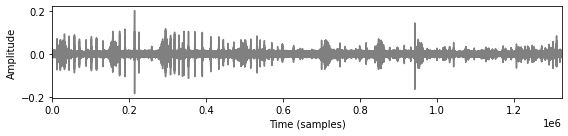

In [4]:


import librosa
# import soundfile as sf 
path = 'c06ad68f4.flac'                                                  
# data, samplerate = sf.read(path) 
data, samplerate = librosa.load(path) #or you can use this

print_plot_play(x=data,Fs=samplerate,text='Signal after writing and reading: ')

In [5]:
samplerate

22050

In [6]:
[b_, a_] = butter(1, [10000 / (0.5*samplerate) , 11020/ (samplerate*0.5) ], btype='bandpass')
_denoise = scipy.signal.filtfilt(b_, a_, np.double(data))
print('',len(_denoise)) #1050


 1323000


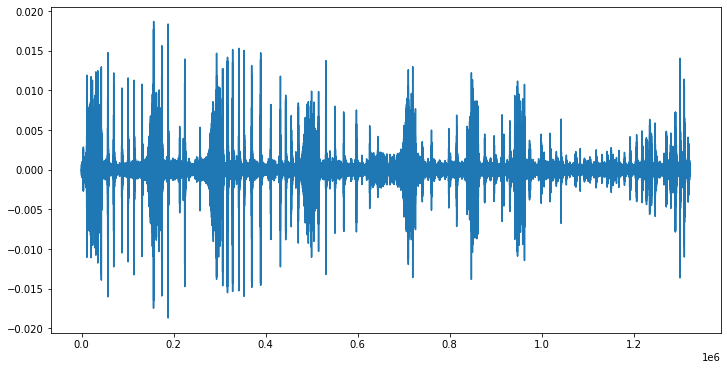

In [7]:
plt.figure(figsize=(12,6))
plt.plot(_denoise)

In [8]:
ipd.display(ipd.Audio(data=_denoise, rate=samplerate))

In [9]:
a=ipd.Audio(data=_denoise, rate=samplerate)

In [10]:
with open('test.wav', 'wb') as f:
    f.write(a.data)

In [11]:
import librosa
import IPython.display as ipd
import scipy.io
from scipy.signal import butter,filtfilt

def denoise(path):
  """1. uses bandpass on audio sample and returns a wav audio file
    
    Notebook: 1.0-jr-initial-signal-preprocessing.ipynb
    
    Args: 
        x: path
  """

  data, samplerate = librosa.load(path)
  [b_, a_] = butter(1, [10000 / (0.5*samplerate) , 11020/ (samplerate*0.5) ], btype='bandpass')
  _denoise = scipy.signal.filtfilt(b_, a_, np.double(data))
  a=ipd.Audio(data=_denoise, rate=samplerate)
  with open('test.wav', 'wb') as f:
    f.write(a.data)

